# Hyperparameter Tuning

This notebook works in tandem with the updated training script `nf_train.py`. The input of the training script has been changed to allow flexibility in the changing various hyperparameters and detailed performance recording in JSON. These JSON files hold all of the nessacry run information and can be used to configure inferernce or further training. 

The explore the space of the parameter set this notebook contains a set of functions to generate all the possible combinations of a user given set of parameters.

In [3]:
import pandas as pd
import sys
sys.path.append('..')
import os
root_dir = os.path.split(os.getcwd())[0]
search_path = os.path.join(root_dir, 'tuning','20mins')


### Timed 20 min runtime per method.

Deciding which configuration is the most useful practically is dependent on the speed to train not just the final loss. Therefore in this approach all methods were trained for the same length of time.  

In this tune there are 12 20min trainings, with a total training time of 4 hours

In [ ]:
from tools.tuning import run_combinations

params = {}
params['blocks'] = [10, 20, 30] 
params['hidden'] = [128, 200]
params['A'] = ['tanh','relu'] #activation function
params['N'] = [1000] #number of epochs

results, json_path = run_combinations(params, outdir=search_path, time=20)

There are  12  combinations in this search
Run No =  1  :  {'blocks': 10, 'hidden': 128, 'A': 'tanh', 'N': 1000}
Using cuda , Log is off, , Early stopping is on.DataLoader is on.
start
 28%|███████████                             | 276/1000 [20:00<52:29,  4.35s/it]
Time used for training:1200.6873309612274 s
run infomation saved to /home/melika/jake/Thesis_Notes/code/nf-emulator/tuning/20mins/blocks_10_hidden_128_A_tanh_N_1000_V2_20min.json
Run No =  2  :  {'blocks': 10, 'hidden': 128, 'A': 'relu', 'N': 1000}
Using cuda , Log is off, , Early stopping is on.DataLoader is on.
start
 28%|███████████                             | 276/1000 [20:00<52:28,  4.35s/it]
Time used for training:1200.2440950870514 s
run infomation saved to /home/melika/jake/Thesis_Notes/code/nf-emulator/tuning/20mins/blocks_10_hidden_128_A_relu_N_1000_V2_20min.json
Run No =  3  :  {'blocks': 10, 'hidden': 200, 'A': 'tanh', 'N': 1000}
Using cuda , Log is off, , Early stopping is on.DataLoader is on.
start
 22%|██████

### Automitically load the best model

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_loss(json_path, existing_ax = False, label = False):
    if type(json_path) == 'dict':
        run_info = json_path
    else:
        from tools.tuning import get_run
        run_info = get_run(json_path)
    lb =''
    if label is not False: lb=label
    if existing_ax is not False:
        ax = existing_ax
    else:
        fig, ax = plt.subplots(figsize = (15,5))
        
    train_loss = np.load(run_info['loss_path'])['train_loss.npy']
    valid_loss = np.load(run_info['loss_path'])['valid_loss.npy']

    print(np.min(train_loss), np.min(valid_loss))
    epoch= np.arange(start= 1, stop =train_loss.size+1)
    df_loss=pd.DataFrame(data=np.column_stack([epoch,train_loss, valid_loss])
                        , columns=['epoch','train_loss','valid_loss'])                   
    sns.lineplot(data=df_loss, x='epoch', y='valid_loss', label=f'Validation {lb}', ax=ax)
    sns.lineplot(data=df_loss, x='epoch', y='train_loss', label=f'Training {lb}',ax =ax)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend() 

In [6]:
from tools.tuning import get_results_table
search_path = os.path.join(root_dir,'tuning','20mins')

params = {}
params['blocks'] = [5, 10, 20, 30] 
params['hidden'] = [128, 200]
params['A'] = ['tanh','relu'] #activation function
params['N'] = [100] #number of epochs

results=get_results_table(search_path, params)


Shortest Run: 1200.2028172016144 blocks_10_hidden_128_A_relu_N_1000_V2_20min
\begin{tabular}{lllllll}
\toprule
Epochs & Activation & Blocks & Hidden &  L\_V & Loss Rate & Runtime [s] \\
\midrule
   276 &       relu &     10 &    128 & 5.09 & -0.000105 &      1200.0 \\
   116 &       tanh &     20 &    200 & 5.29 & -0.000116 &      1210.0 \\
   216 &       tanh &     10 &    200 & 5.25 & -0.000149 &      1200.0 \\
   151 &       tanh &     20 &    128 & 5.31 &  -0.00015 &      1200.0 \\
   104 &       tanh &     30 &    128 & 5.43 & -0.000173 &      1210.0 \\
    79 &       tanh &     30 &    200 & 5.56 &  -0.00029 &      1210.0 \\
   105 &       relu &     30 &    128 & 5.45 & -0.000382 &      1200.0 \\
   276 &       tanh &     10 &    128 & 5.19 & -9.17e-05 &      1200.0 \\
  1000 &       relu &     10 &    200 & 5.56 &       nan &      5450.0 \\
    81 &       relu &     30 &    200 & 6.06 &       nan &      1210.0 \\
   117 &       relu &     20 &    200 & 5.27 &       nan &      1

/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/notebooks/../tools/tuning.py:145: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_all_info.sort_values('Loss Rate', ascending=True).to_latex(index=False))


In [13]:
from tools.tuning import get_matches
matches= get_matches(search_path, {'epochs' : 1}, criteria = '>')
matches

['/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_30_hidden_200_A_tanh_N_1000_V2_20min.json',
 '/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_10_hidden_200_A_relu_N_1000_V2_20min.json',
 '/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_20_hidden_200_A_tanh_N_1000_V2_20min.json',
 '/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_30_hidden_200_A_relu_N_1000_V2_20min.json',
 '/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_20_hidden_200_A_relu_N_1000_V2_20min.json',
 '/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_10_hidden_200_A_tanh_N_1000_V2_20min.json',
 '/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_20_hidden_128_A_relu_N_1000_V2_20min.json',
 '/media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/20mins/blocks_10_hidden_12

In [14]:
i=0
for m in matches: 
    m_run = get_run(m)
    train_loss = np.load(m_run['loss_path'])['train_loss.npy']
    valid_loss = np.load(m_run['loss_path'])['valid_loss.npy']

    epoch= np.arange(start= 1, stop =train_loss.size+1)
    
    df_loss=pd.DataFrame(data=np.column_stack([epoch,train_loss, valid_loss])
                        , columns=['epoch','train_loss','valid_loss'])
    df_loss['run'] = m_run['label'] 

    if i==0:
        df_all_loss=df_loss    
    else:
        df_all_loss=pd.concat([df_all_loss, df_loss])
    i+=1

df_all_loss

,epoch,train_loss,valid_loss,run
0,1.0,12.130821,13.232996,blocks_30_hidden_200_A_tanh_N_1000_V2_20min
1,2.0,6.887202,10.968773,blocks_30_hidden_200_A_tanh_N_1000_V2_20min
2,3.0,6.170169,9.400691,blocks_30_hidden_200_A_tanh_N_1000_V2_20min
3,4.0,5.751297,8.509313,blocks_30_hidden_200_A_tanh_N_1000_V2_20min
4,5.0,5.878425,7.947125,blocks_30_hidden_200_A_tanh_N_1000_V2_20min
...,...,...,...,...
100,101.0,5.326006,5.478974,blocks_30_hidden_128_A_tanh_N_1000_V2_20min
101,102.0,5.327342,5.477020,blocks_30_hidden_128_A_tanh_N_1000_V2_20min
102,103.0,5.303954,5.475030,blocks_30_hidden_128_A_tanh_N_1000_V2_20min
103,104.0,5.308033,5.472911,blocks_30_hidden_128_A_tanh_N_1000_V2_20min


## Loss

#### Training Loss

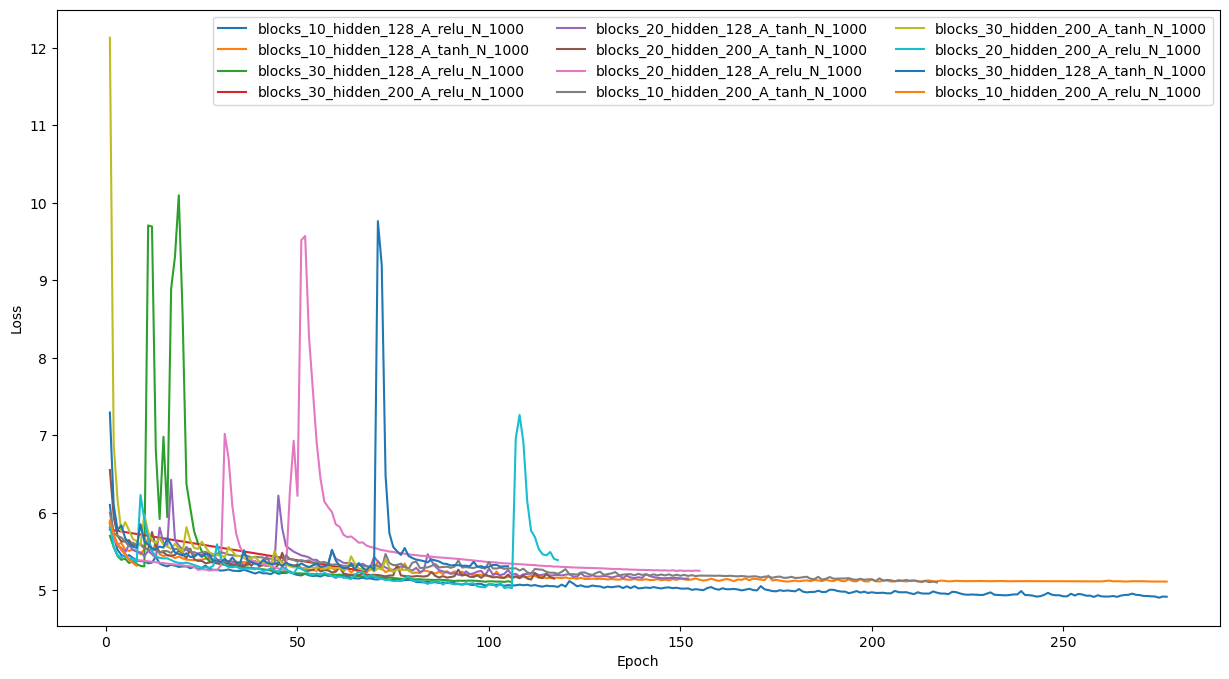

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
df_loss=df_loss[df_loss['valid_loss']!=np.inf]
runs = df_loss['run'].unique()

for r in runs:
    df_r=df_loss[df_loss['run']==r]
    plt.plot(df_r['epoch'],df_r['train_loss'], label=r[:-9])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
plt.legend(ncols=3)


#### Validation Loss

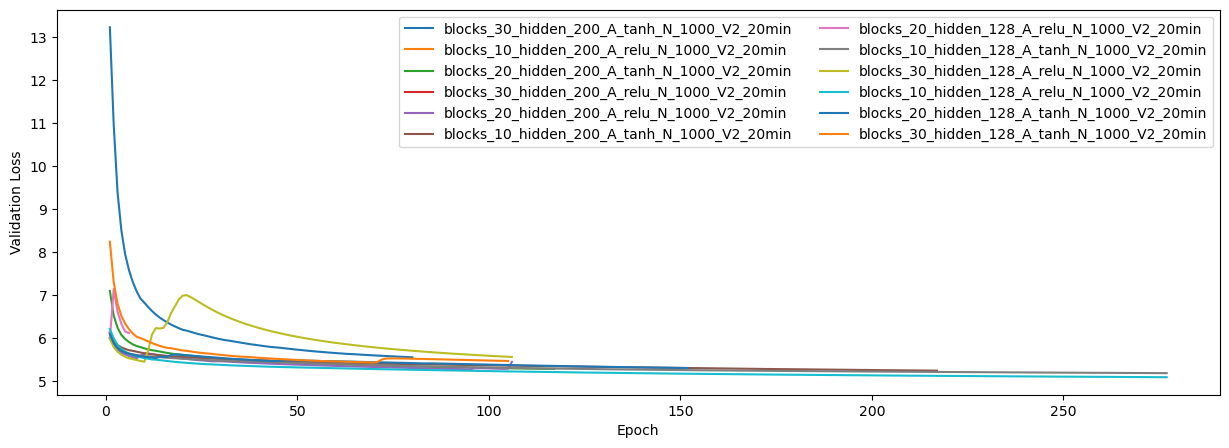

In [22]:
#sns.lineplot(hue='run',data=df_all_loss, x='epoch', y='valid_loss')
plt.figure(figsize = (15,5))
for col in df_all_loss['run'].unique():
    sns.lineplot(data=df_all_loss[df_all_loss['run']==col], x='epoch', y='valid_loss', label = col)

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(ncol=2)

### Automatic selection of the best run 

In [8]:
from tools.tuning import get_best_run
from pprint import pprint
best_run = get_best_run(search_path)
pprint(best_run)

Best run loss 5.556044919674213
Best run loss inf
Best run loss 5.2854789703163485
Best run loss nan
Best run loss nan
Best run loss 5.2456712685591445
Best run loss nan
Best run loss 5.187637968945258
Best run loss 5.563957050680595
Best run loss 5.092655049201946
Best run loss 5.306275175891907
Best run loss 5.470944465036357
{'A': 'tanh',
 'MAFconfig': {'act': 'tanh',
               'num_blocks': 30,
               'num_cond_inputs': 2,
               'num_hidden': 128,
               'num_inputs': 2},
 'batch_size': 40000,
 'best_loss': 5.434244029600542,
 'best_model_path': '/home/melika/jake/Thesis_Notes/code/nf-emulator/tuning/20mins/blocks_30_hidden_128_A_tanh_N_1000_V2_20min1low.pt',
 'blocks': 30,
 'd_score_rate': [-0.08204586398082174,
                  -0.043330237657334736,
                  -0.024825844094458344,
                  -0.015489656789867298,
                  -0.011229084497397634,
                  -0.008730087957182612,
                  -0.00678547353000974

5.259055 5.434244029600542


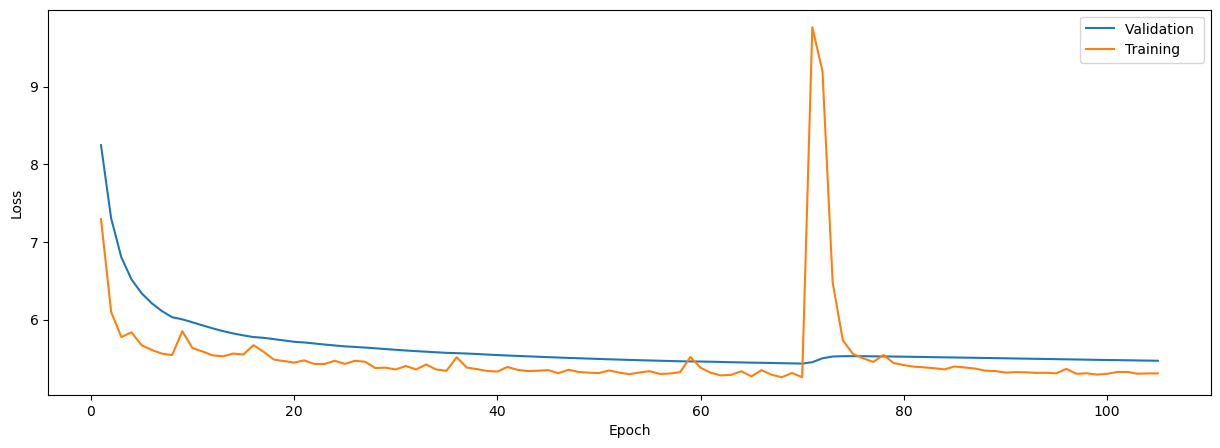

In [9]:
from tools.plotting import plot_loss
plot_loss(best_run)

In [5]:
import sys
sys.path.append('..')
import os
from tools.constants import root_dir, data_dir
params = {'N': [1000], 'blocks' : [20]}
outdir = os.path.join(root_dir, 'tuning', 'N1000')
results, json_path = run_combinations(params, outdir=outdir)


('N', 'blocks') ([1000], [20])
There are  1  combinations in this search
[{'N': 1000, 'blocks': 20}]
Run No =  1  :  {'N': 1000, 'blocks': 20}
-N 1000 -blocks 20 -O /media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/N1000 -label N_1000_blocks_20 
num_cond_inputs =  2 , num_inputs = 2
Using cuda , Early stopping is on.DataLoader is on.
start
100%|█████████████████████████████████████| 1000/1000 [2:12:09<00:00,  7.93s/it]
Time used for training:7929.28506064415 s
run infomation saved to /media/melika/SamsungUSB/Normalising_Flows_for_Orbital_Params/tuning/N1000/N_1000_blocks_20.json


NameError: name 'json' is not defined